In [104]:
import matplotlib.pyplot as plt
import re

In [105]:
#记录每条流每时的速率
UDP_flows = {}
TCP_flows = {}
#flows[12] = [1,2]
#print(flows[12])

In [106]:
#按行读取文件
UDP_file_path = 'UDP_RES'
#file_path = 'AFQ_RES5'
with open(UDP_file_path) as f:
    for line in f:
        # print(line)
        result = re.match(r'\[ (\d)*\].*',line)
        if result:
            # print(result.group())
            # print(re.search(r'\[ (\d)*\]',line).group())
            index = re.search(r'\[ (\d)*\]',line).group()
            if index not in UDP_flows:
                UDP_flows[index] = []
                # print(index)
            else:
                value = re.search(r'(((\d)*)((\.)?)((\d)*) Mbits/sec)|(((\d)*)((\.)?)((\d)*) Kbits/sec)',line)
                if value:
                    value = value.group()
                    # print(index,value)
                    UDP_flows[index].append(value)
print(UDP_flows)

{'[ 12]': ['47.0 Kbits/sec', '176 Kbits/sec', '176 Kbits/sec', '129 Kbits/sec', '153 Kbits/sec', '212 Kbits/sec', '106 Kbits/sec', '165 Kbits/sec', '176 Kbits/sec', '153 Kbits/sec', '153 Kbits/sec'], '[ 13]': ['47.0 Kbits/sec', '188 Kbits/sec', '165 Kbits/sec', '129 Kbits/sec', '153 Kbits/sec', '200 Kbits/sec', '118 Kbits/sec', '165 Kbits/sec', '176 Kbits/sec', '165 Kbits/sec', '153 Kbits/sec'], '[ 14]': ['47.0 Kbits/sec', '176 Kbits/sec', '176 Kbits/sec', '129 Kbits/sec', '141 Kbits/sec', '223 Kbits/sec', '106 Kbits/sec', '165 Kbits/sec', '176 Kbits/sec', '153 Kbits/sec', '153 Kbits/sec'], '[ 15]': ['35.3 Kbits/sec', '176 Kbits/sec', '188 Kbits/sec', '129 Kbits/sec', '141 Kbits/sec', '212 Kbits/sec', '106 Kbits/sec', '176 Kbits/sec', '176 Kbits/sec', '165 Kbits/sec', '153 Kbits/sec'], '[ 16]': ['35.3 Kbits/sec', '188 Kbits/sec', '176 Kbits/sec', '118 Kbits/sec', '153 Kbits/sec', '212 Kbits/sec', '106 Kbits/sec', '176 Kbits/sec', '165 Kbits/sec', '165 Kbits/sec', '153 Kbits/sec']}


In [107]:
#按行读取文件
TCP_file_path = 'TCP_RES'
#file_path = 'AFQ_RES5'
with open(TCP_file_path) as f:
    for line in f:
        # print(line)
        result = re.match(r'\[ (\d)*\].*',line)
        if result:
            # print(result.group())
            # print(re.search(r'\[ (\d)*\]',line).group())
            index = re.search(r'\[ (\d)*\]',line).group()
            if index not in TCP_flows:
                TCP_flows[index] = []
                # print(index)
            else:
                value = re.search(r'(((\d)*)((\.)?)((\d)*) Mbits/sec)|(((\d)*)((\.)?)((\d)*) Kbits/sec)',line)
                if value:
                    value = value.group()
                    # print(index,value)
                    TCP_flows[index].append(value)
print(TCP_flows)

{'[ 13]': ['973 Kbits/sec', '34.8 Kbits/sec', '127 Kbits/sec', '162 Kbits/sec', '162 Kbits/sec', '174 Kbits/sec', '185 Kbits/sec', '266 Kbits/sec', '209 Kbits/sec', '116 Kbits/sec', '34.8 Kbits/sec', '197 Kbits/sec', '174 Kbits/sec', '151 Kbits/sec', '185 Kbits/sec', '232 Kbits/sec', '579 Kbits/sec', '174 Kbits/sec', '219 Kbits/sec']}


In [108]:
for index in UDP_flows:
    # print(flows[index])
    for ind,value in enumerate(UDP_flows[index]):
        # print(ind,value)
        if value[-9:] == 'Mbits/sec':
            # print(ind,value)
            value = float(value[:-9])
            value *= 1000
            UDP_flows[index][ind] = value
        elif value[-9:] == 'Kbits/sec':
            value = float(value[:-9])
            UDP_flows[index][ind] = value
            
#数据对齐 dqn
#flows['[ 12]'] = flows['[ 12]'][1:]
#flows['[ 13]'] = flows['[ 13]'][:-1]

#数据对齐 afq
#flows['[ 12]'] = flows['[ 12]'][1:]
#flows['[ 13]'] = flows['[ 13]'][:-1]
print(UDP_flows)

{'[ 12]': [47.0, 176.0, 176.0, 129.0, 153.0, 212.0, 106.0, 165.0, 176.0, 153.0, 153.0], '[ 13]': [47.0, 188.0, 165.0, 129.0, 153.0, 200.0, 118.0, 165.0, 176.0, 165.0, 153.0], '[ 14]': [47.0, 176.0, 176.0, 129.0, 141.0, 223.0, 106.0, 165.0, 176.0, 153.0, 153.0], '[ 15]': [35.3, 176.0, 188.0, 129.0, 141.0, 212.0, 106.0, 176.0, 176.0, 165.0, 153.0], '[ 16]': [35.3, 188.0, 176.0, 118.0, 153.0, 212.0, 106.0, 176.0, 165.0, 165.0, 153.0]}


In [109]:
for index in TCP_flows:
    # print(flows[index])
    for ind,value in enumerate(TCP_flows[index]):
        # print(ind,value)
        if value[-9:] == 'Mbits/sec':
            # print(ind,value)
            value = float(value[:-9])
            value *= 1000
            TCP_flows[index][ind] = value
        elif value[-9:] == 'Kbits/sec':
            value = float(value[:-9])
            TCP_flows[index][ind] = value
            
#数据对齐 dqn
#flows['[ 12]'] = flows['[ 12]'][1:]
TCP_flows['[ 13]'] = TCP_flows['[ 13]'][1:]

#数据对齐 afq
#flows['[ 12]'] = flows['[ 12]'][1:]
#flows['[ 13]'] = flows['[ 13]'][:-1]
print(TCP_flows)

{'[ 13]': [34.8, 127.0, 162.0, 162.0, 174.0, 185.0, 266.0, 209.0, 116.0, 34.8, 197.0, 174.0, 151.0, 185.0, 232.0, 579.0, 174.0, 219.0]}


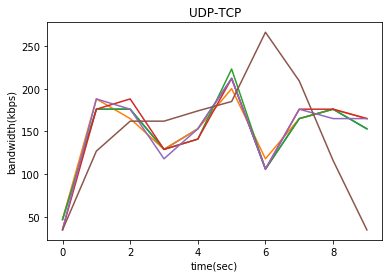

In [110]:
#正式画图
fig = plt.figure()
plt.title('UDP-TCP')
plt.ylabel('bandwidth(kbps)')
plt.xlabel('time(sec)')
for index in UDP_flows:
    plt.plot(UDP_flows[index][:-1])
for index in TCP_flows:
    plt.plot(TCP_flows[index][:-8])
plt.savefig("UDP_TCP.png")
plt.show()